In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
heart_data = pd.read_csv('heart_cleveland_upload.csv')

In [16]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [18]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [20]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [22]:
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [24]:
heart_data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

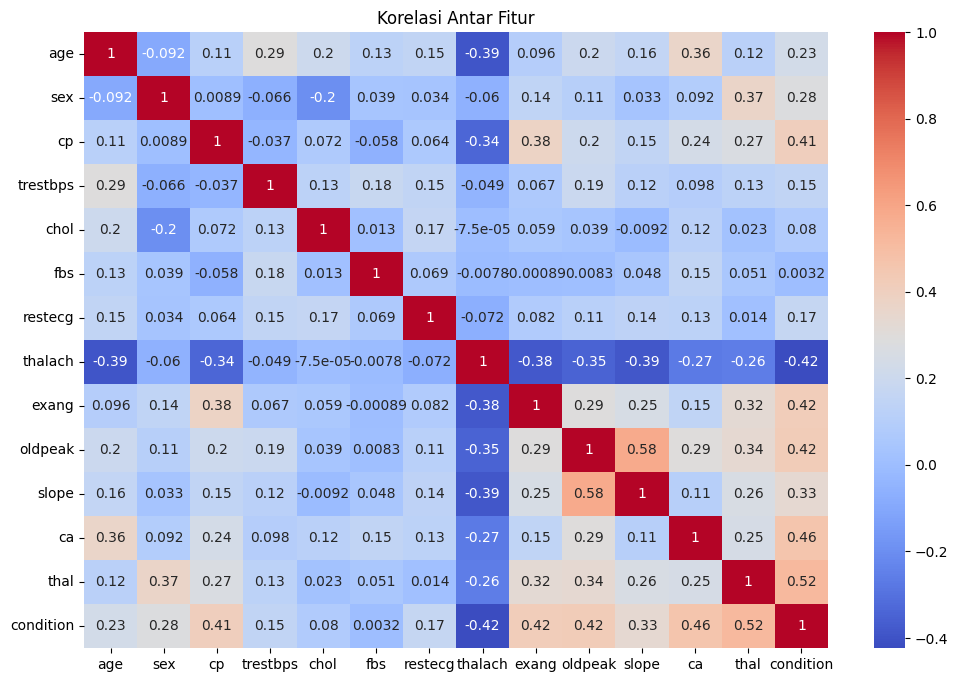

In [47]:
# Korelasi antar fitur
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

In [26]:
X = heart_data.drop(columns='condition', axis=1)
Y = heart_data['condition']

In [32]:
!pip install scikit-learn

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (237, 13)
Testing data: (60, 13)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Akurasi
print("Akurasi Training:", accuracy_score(Y_train, train_pred))
print("Akurasi Testing:", accuracy_score(Y_test, test_pred))


Akurasi Training: 0.8481012658227848
Akurasi Testing: 0.9166666666666666


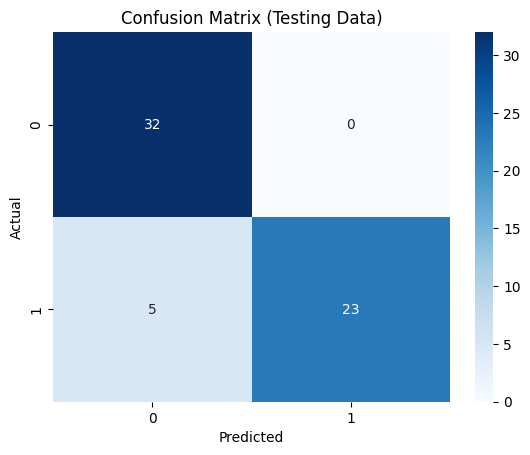

In [48]:
# Confusion matrix
cm = confusion_matrix(Y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# Classification report
print("Classification Report:\n", classification_report(Y_test, test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



In [54]:
# Contoh input data baru
input_data = (69, 1, 0, 160, 234, 1, 2, 131, 0, 0.1, 1, 1, 0)

input_np = np.asarray(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_np)

prediction = model.predict(input_scaled)

if prediction[0] == 0:
    print("Pasien Tidak Terkena Penyakit Jantung")
else:
    print("Pasien Terkena Penyakit Jantung")

Pasien Tidak Terkena Penyakit Jantung


C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
import pickle

In [57]:
filename = 'heart_model.sav'
pickle.dump(model, open(filename, 'wb'))